<a href="https://colab.research.google.com/github/jaewon-huh/DA_DS_dreamtree/blob/main/titinic_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"realspbabo","key":"84850eca11ef7983c622626ae833305f"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c titanic


  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 24.1MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.69MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.9MB/s]


csv 파일을 df로 로드

In [6]:
import pandas as pd
train = pd.read_csv('train.csv')


In [9]:
train.shape

(891, 12)

891 개의 data와 12개의 칼럼이 있습니다.

In [11]:
# .info()로 종합정보를 확인 (레코드 , columns )수 , 변수들 , 변수의 데이터 타입, 결측치 여부 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


결측치가 있는지 확인

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


df 분포 확인

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


각 컬럼의 데이터 타입 확인

In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

'Cabin' , 'Embarked' 필드에는 어떤 값이 있는지 확인


In [ ]:
train[['Cabin','Embarked']].value_counts()

Cabin        Embarked
C23 C25 C27  S           4
G6           S           4
B96 B98      S           4
F33          S           3
F2           S           3
                        ..
B94          S           1
B86          C           1
B82 B84      C           1
B80          C           1
T            S           1
Length: 149, dtype: int64

.unique() 로 고유값을 확인합니다.

In [ ]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

생존한 사람 , 사망한 사람의 수 확인하기 

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# 생존한 사람 Survived 1 
survived = train.Survived.sum()
# 죽은 사람 : 전체 레코드 수 - 산 사람
dead = train.shape[0] - survived 
print( (survived, dead))

(342, 549)


각 클래스 (Pclass) 별 탑승객 분포 확인


In [ ]:
train['people'] = 1
grouped = train.groupby('Pclass')

grouped.sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare,people
Pclass,,,,,,,
1,99705,136,7111.42,90,77,18177.4125,216
2,82056,87,5168.83,74,70,3801.8417,184
3,215625,119,8924.92,302,193,6714.6951,491


In [ ]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

성(sex) 별 탑승객 분포 확인

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

'Embarked' 필드의 결측치는 값이 가장 많은 'S'로 할당하기

In [ ]:
train.info()
print('\n')
train['Embarked'].value_counts(dropna =False)  # 열의 Nan 개수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  people       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB




S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Embarked 열의 결측치는 2개고 최빈값은 'S'

In [ ]:
train['Embarked'].fillna('S' ,inplace =True)

train['Embarked'].value_counts(dropna =False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

'Age'필드의 결측치는 값을 중간값으로 할당하기

In [ ]:
train['Age'].isnull().sum(axis =0)  # 열의 Nan 개수 확인

177

In [ ]:
age_mid = train['Age'].median()
print(age_mid, '\n')
train['Age'].fillna(age_mid, inplace =True)
train['Age'].unique()

28.0 



array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

**'Name' 필드에서 신분을 나타내는 단어를 뽑아서 'Title'필드에 저장하기**

In [ ]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

**이름 구성 : a, mr/ms.name**   
**Data['lable'].str.extract(pat, flag , expand)**

1.   pat = 추출할 조건 
2.  expand = T/ F default T , 
   True인경우 출력을 하나의 column 단위로 나타내고  
   F인경우 label 단위로 



dataset['Name']**.str.extract**(' ([A-Za-z]+\.)', expand = False)

-> 대문자로 시작해서 소문자 나열 , 점 . 을 만나면 중지 추출
Mr. Mrs. 

In [ ]:
 train['Title']= train['Name'].str.extract(' ([A-Za-z]+\.)', expand = False)
 train['Title'].head()

0      Mr.
1     Mrs.
2    Miss.
3     Mrs.
4      Mr.
Name: Title, dtype: object

**'Title' 필드의 카테고리를 6개 항목으로 변경하기**

In [ ]:
train['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

: 카테고리를 통합 ( 이름 값들을 변경?)  
**-> replace('기존값' ,'바꿀값 ', inplace = )?**



In [ ]:
train['Title'].replace(['Capt.', 'Col.', 'Major.', 'Dr.', 'Rev.'], 'Officer.', inplace =True)
train['Title'].replace(['Jonkheer.', 'Master.'], 'Master.', inplace =True)
train['Title'].replace(['Don.', 'Sir.', 'Countess.', 'Lady.', 'Dona.'], 'Royalty.', inplace =True)
train['Title'].replace(['Mme.', 'Ms.', 'Mrs.'], 'Mrs.', inplace =True)
train['Title'].replace(['Mlle.', 'Miss.'], 'Miss', inplace =True)
train['Title'].replace(['Mr.'], 'Mr.', inplace =True)

train['Title'].value_counts()

Mr.         517
Miss        184
Mrs.        127
Master.      41
Officer.     18
Royalty.      4
Name: Title, dtype: int64

변수 y를 선언해서 학습할 목표변수(=종속변수)인 'Survived'필드값을 담기






In [ ]:
y = train['Survived']

**나이('Age') 필드를 그룹핑하여 'AgeGroup'필드 생성하여 할당하기**

> AgeGroup 이란 새변수로 나이 값들을 범주화
(범주형 카테고리/ 구간 분할! )





1. 판다스 cut() 함수 
 
```
# pd.cut(x = df, bins =  , labels , include_lowest = T/F ) 
```



In [ ]:
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
bin = [0, 18, 25, 35, 60 , 100]   # 경계 값 리스트
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior'] # 각 구간의 이름 

train['AgeGroup'] = pd.cut(train['Age'], bins = bin , labels = group_names )
train['AgeGroup'].value_counts()

YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64

# 데이터 시각화 실습

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


학습 데이터 셋(train)의 데이터 분포 확인하기 
: 각 컬럼에 대한 분포   

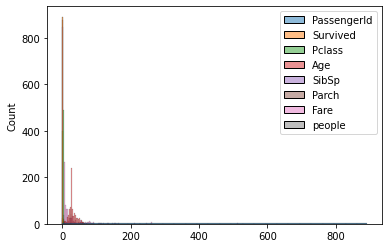

In [ ]:
sns.histplot(data = train)

성별('sex')의 생존여부('survived') 데이터 분포 확인하기 : barplot

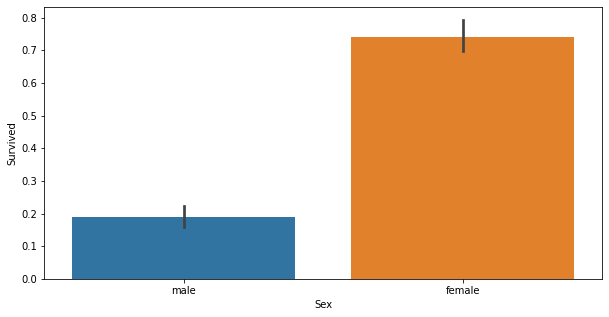

In [ ]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
sns.barplot(data = train , x = 'Sex', y ='Survived', ax = ax)
ax1.set()

탑승 클래스 ('Pclass')별 + '성별('sex') 생존여부 데이터 분포 확인하기 : barplot  
hue = 'sex' 인자 추가 

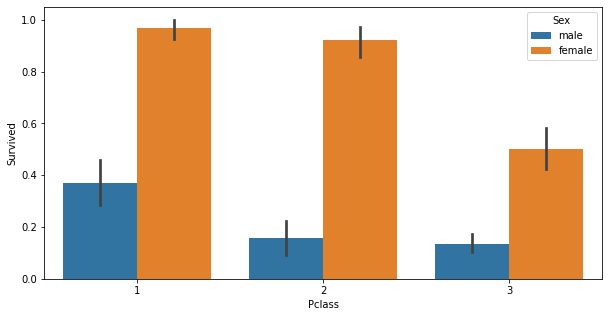

In [ ]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
sns.barplot(data = train , x = 'Pclass', y ='Survived', hue= 'Sex' ,ax = ax)

**전체 변수의 correlation 에대해 히트맵 그리기**

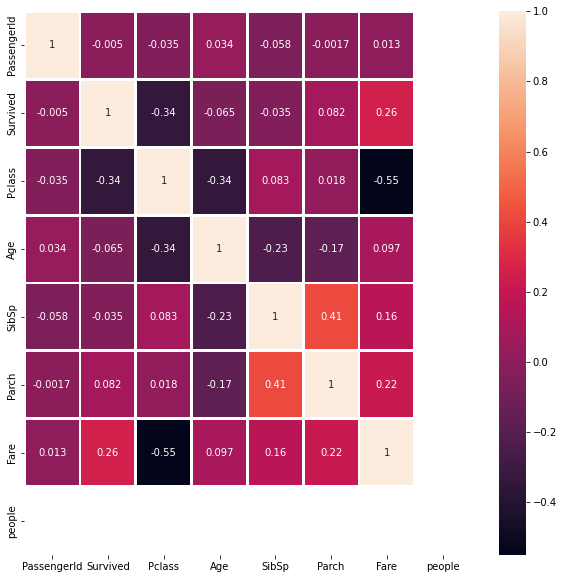

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
sns.heatmap(train.corr(), #표시할 인자 (상관계수)
            annot = True, # 데이터 값 표시 여부
            linewidth = 2, # 구분선 
            ax = ax)

연령 분포('AgeGroup') 별 + '클래스('Pclass')별 생존여부 데이터 분포 확인하기 : barplot  
더 범주 큰것 : x 축 , 범주 작은것 : hue , dodge =F 로 stacked

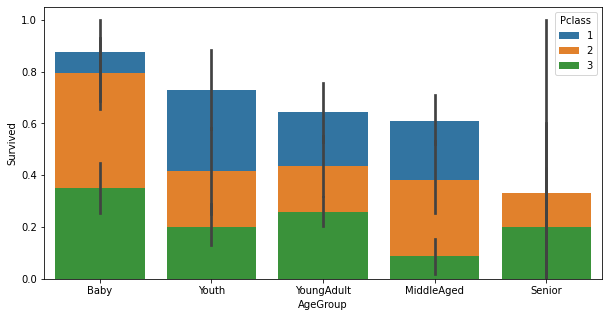

In [ ]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
sns.barplot(data = train , x = 'AgeGroup', y ='Survived', hue= 'Pclass' ,ax = ax ,dodge =False)

형제/자매수("SibSp")별 + 클래스('Pclass') 별 생존여부("Survived")




In [ ]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

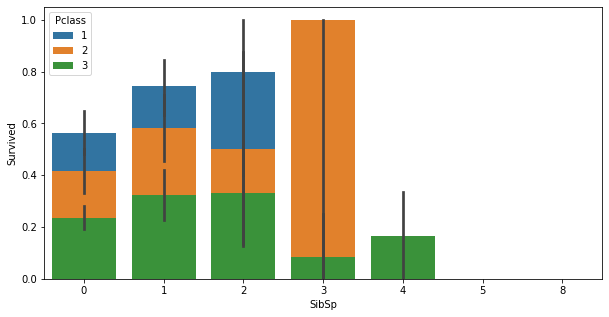

In [ ]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
sns.barplot(data = train , x = 'SibSp', y ='Survived', hue= 'Pclass' , dodge =False, ax = ax)